# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. 
    
    2. 
    
    3.

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [1]:
import pandas as pd
seed = 379074
data = pd.read_csv("dataset.csv")
sampled_data = data.sample(frac=0.9, random_state=seed)
sampled_data.sort_index(inplace=True)
sampled_data.to_csv("sampled_data.csv")

## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [2]:
sampled_data = pd.read_csv("sampled_data.csv")
new_sampled_data = data[(data["SurfaceR"] < 50000)]
print("Old shape:", sampled_data.shape)
print("New shape:", new_sampled_data.shape)

Old shape: (170, 23)
New shape: (183, 22)


   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

Lower whisker: 30.0
Upper_whisker: 5000.0
Old shape: (183, 22)
New shape: (155, 22)


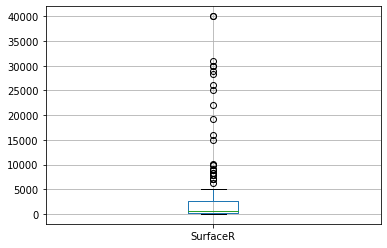

In [3]:
# Create boxplot
mpl_lines = new_sampled_data.boxplot(column="SurfaceR", return_type="dict")

# Get upper and lower whiskers by reading the y-values
# of the corresponding lines in the plot
lower_whisker = mpl_lines["caps"][0].get_ydata()[0]
upper_whisker = mpl_lines["caps"][1].get_ydata()[0]
print("Lower whisker:", lower_whisker)
print("Upper_whisker:", upper_whisker)
# Remove outliers = points exceeding whiskers
# i.e. keep points not exceeding whiskers
cleaned_data = new_sampled_data[new_sampled_data["SurfaceR"] >= lower_whisker]
cleaned_data = cleaned_data[cleaned_data["SurfaceR"] <= upper_whisker]
print("Old shape:", new_sampled_data.shape)
print("New shape:", cleaned_data.shape)

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [4]:
from statistics import median, mean, mode, stdev, variance

#Calculate different metrics for both datasets
for metric, metric_name in [
                            [median, "Median"],
                            [mean, "Mean"],
                            [mode, "Mode"],
                            [stdev, "Standard deviation"],
                            [variance, "Variance"],
                           ]:
    print(metric_name+":")
    for dataset in [new_sampled_data, cleaned_data]:
        print(metric(dataset["SurfaceR"]), end="\t")
    print()

Median:
600	400	
Mean:
3473.6612021857923	1032.774193548387	
Mode:
300	300	
Standard deviation:
7207.8050060656105	1168.6430889966246	
Variance:
51952453.00546448	1365726.6694595725	


In [5]:
import numpy as np

# Calculate Minimum and Maximum for both datasets
for metric, metric_name in [
                            [np.min, "Minimum"],
                            [np.max, "Maximum"],
                           ]:
    print(metric_name+":")
    for dataset in [new_sampled_data, cleaned_data]:
        print(metric(dataset["SurfaceR"]), end="\t")
    print()

#Calculate the number of outliers below and above the whiskers
n_below_lower_whisker = (new_sampled_data["SurfaceR"] < lower_whisker).sum()
n_above_upper_whisker = (new_sampled_data["SurfaceR"] > upper_whisker).sum()
print("{} data points below lower whisker of {}".format(n_below_lower_whisker, lower_whisker))
print("{} data points above upper whisker of {}".format(n_above_upper_whisker, upper_whisker))

Minimum:
30	30	
Maximum:
40000	5000	
0 data points below lower whisker of 30.0
28 data points above upper whisker of 5000.0


Explanation: 

While no data points below the lower whisker are removed, 28 data points above the upper whisker are removed. Furthermore, the maximum value of SurfaceR for the outliers greatly exceeds the upper whisker (40,000 vs 5,000). Therefore, the **mean** and **median** are higher for new_sampled_data than for cleaned data.

Furthermore, removing the outliers decreases the overall range the data points lie in. Therefore, the **variance** (and consequently, the **standard deviation**) is higher for new_sampled_data than for cleaned_data.

Lastly, the **mode** describes the most common value. This value is more likely to lie in a region where a lot of data points lie, i.e. not in the region of outliers. Therefore, the **mode** is not affected by removing outliers and stays the same for both new_sampled_data and cleaned_data.

### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

Mean:
 Surroundings3
parks                200.000000
forest               791.666667
roads                860.000000
dense buildings      870.465116
sparse buildings     975.000000
river               1560.000000
meadows             1656.250000
agricultural        2000.000000
Name: SurfaceR, dtype: float64

Median:
 Surroundings3
parks                200
forest               300
dense buildings      350
roads                425
sparse buildings     500
meadows              625
river               1000
agricultural        2000
Name: SurfaceR, dtype: int64


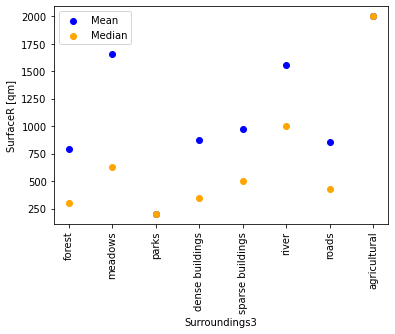

In [6]:
import matplotlib.pyplot as plt

# Calculate mean and median for SurfaceR for different values of Surroundings3
means = cleaned_data["SurfaceR"].groupby(cleaned_data["Surroundings3"]).mean()
medians = cleaned_data["SurfaceR"].groupby(cleaned_data["Surroundings3"]).median()

#Rename indices from keys to names of surrounding areas
surrounding_keys = {
                    "a":"forest",
                    "b":"meadows",
                    "c":"garden",
                    "d":"parks",
                    "e":"dense buildings",
                    "f":"sparse buildings",
                    "g":"river",
                    "h":"roads",
                    "i":"agricultural",
                   }
means = means.rename(index=surrounding_keys)
medians = medians.rename(index=surrounding_keys)

# Plotting
plt.scatter(means.index, means.values, color="blue",label="Mean")
plt.scatter(medians.index, medians.values, color="orange", label="Median")
plt.xticks(rotation="90") #rotate labels of x axis ticks
plt.legend()
plt.xlabel("Surroundings3")
plt.ylabel("SurfaceR [qm]")
#plt.show()

# Print sorted means/medians array to see minimum/maximum value
print("Mean:\n", means.sort_values())
print("\nMedian:\n", medians.sort_values())

Explanation:

As can be seen in the calculated, sorted arrays of means/medians, the mean and median of SurfaceR are
- minimal for Surroundings3 = parks
- maximal for Surroundings3 = agricultural

In both cases, mean and median have the same value, so they lie at the same point in the plot.

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

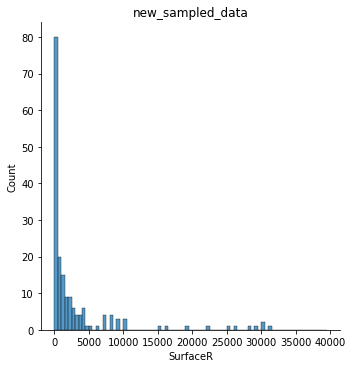

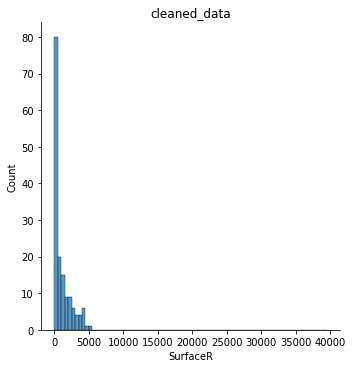

In [7]:
import seaborn as sns

for dataset, dataset_name in [
                              [new_sampled_data, "new_sampled_data"],
                              [cleaned_data, "cleaned_data"],
                             ]:
    sns.displot(data=dataset["SurfaceR"], bins=np.arange(start=0, stop=40000, step=500)) 
    plt.title(dataset_name)
    plt.show()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

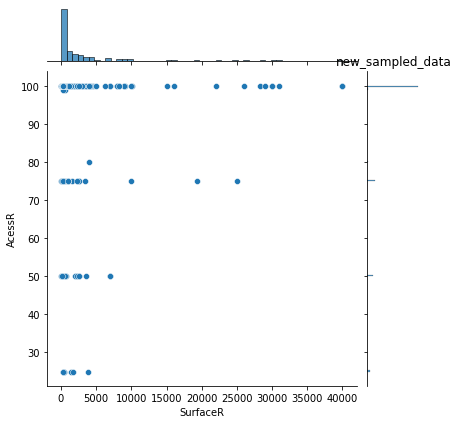

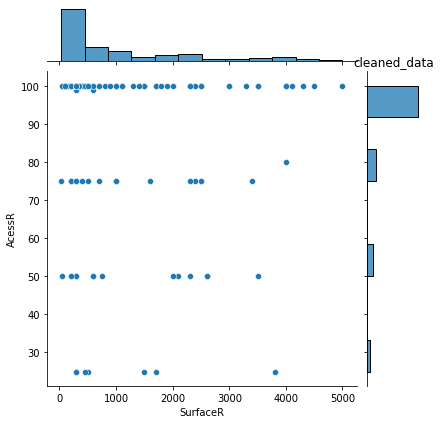

In [8]:
for dataset, dataset_name in [
                              [new_sampled_data, "new_sampled_data"],
                              [cleaned_data, "cleaned_data"],
                             ]:
    sns.jointplot(data=dataset, x="SurfaceR", y="AcessR", kind="scatter")
    plt.title(dataset_name)
    plt.show()

Explanation:

For both datasets, the highest frequency of data points occurs when AcessR is 100 and SurfaceR is in the range 0 to 3000.

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [83]:
number_frogs = pd.Series(new_sampled_data[new_sampled_data.columns[15:]].sum(axis=1),
                         name="number_frogs",
                        )
dct_data = pd.concat([new_sampled_data, number_frogs], axis=1)
dct_data[:2]

ID  SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
0   1       600        1     a            4             e             b   
1   2       700        1     d            1             h             e   

  Surroundings3  UseR  FishingR  ...  PollutionR   ShoreR  Green frogs  \
0             h     0         0  ...           0  natural            0   
1             h     3         1  ...           0  natural            0   

   Brown frogs Common toad  Fire-bellied toad  Tree frog  Common newt  \
0            0           0                  0          0            0   
1            1           1                  0          0            1   

   Great crested newt  number_frogs  
0                   0             0  
1                   0             3  

[2 rows x 23 columns]

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [10]:
from p_decision_tree.DecisionTree import DecisionTree

# Define descriptive and target feature(s)
descriptive_features = ["TypeR", "VegetationR", "Surroundings1", 
                        "Surroundings2", "Surroundings3"]
target = "number_frogs"

# Generate decision trees
tree1 = DecisionTree(dct_data.astype("string")[descriptive_features].values.tolist(),
                     descriptive_features,
                     dct_data.astype("string")[target].values,
                     "entropy",
                    )
tree2 = DecisionTree(dct_data.astype("string")[descriptive_features].values.tolist(),
                     descriptive_features,
                     dct_data.astype("string")[target].values,
                     "entropy",
                    )
# Set minimum number of samples
tree1.id3(0,15)
tree2.id3(0,1)

# Visualize the generated decision trees (see tree1.pdf, tree2.pdf)
dot1 = tree1.print_visualTree(render=True)
dot2 = tree2.print_visualTree(render=True)

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

Explanation: 

TypeR was chosen in the first round of ID3, as can be seen in the generated decision tree (see tree1.pdf). Based on the value of TypeR, different attributes are best for splitting the tree (based on highest information gain / entropy difference) in the second step:

- TypeR = a (natural) or TypeR = j (streams, creeks): Surroundings3
- TypeR = h (wet meadows, flood plains, marshes): Surroundings2
- TypeR = b, d, e, g, i: No further splits, as the splitting condition of a minimum number of samples of 15 was not fulfilled.
- TypeR = c, f did not occur in the sampled dataset.

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

Explanation:

Visually, it is immediately clear that tree2 is of considerably higher complexity than tree1, as it has a lot more branches and, consequently, leaves. Tree2 is therefore also more prone to overfitting, as the number of leaves is close to the number of samples used to train the model.
This happens because the minimum number of samples for splitting is 1 for tree2. Therefore, ID3 can find a tree where each leaf contains really few samples. Tree2 is thus able to remember the training data by heart (by creating a leaf for every unique sample), i.e. it overfits.

As the minimum number of samples for splitting is 15 for tree1, it is of lower complexity and less likely to overfit.

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [11]:
regression_data = cleaned_data.drop(["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3",
                                     "Common toad", "Fire-bellied toad", "Tree frog", "Common newt",
                                     "Great crested newt"], axis=1)
# "SurfaceR", "NumberR", "AcessR", "RoadDistance", "BuildingR"
# "VegetationR", "UseR", "FishingR", "PollutionR"
# "Green frogs", "Brown frogs"
print(regression_data["TypeR"].unique())
print(regression_data["ShoreR"].unique())
regression_data

['a' 'd' 'h' 'i' 'j' 'g' 'b' 'e']
['natural' 'concrete']


SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
0         600     a            4     0         0      50              0   
1         700     d            1     3         1      75              1   
2         200     d            1     3         4      75              1   
3         300     d            0     3         4      25              0   
4         600     a            4     0         0      99              0   
..        ...   ...          ...   ...       ...     ...            ...   
184      2300     h            3     0         0      75              2   
185       300     i            2     0         0     100              5   
186       500     a            4     0         0     100              5   
187       300     h            3     0         0     100              1   
188       300     h            3     0         0     100              1   

     BuildingR  PollutionR   ShoreR  Green frogs  Brown frogs  
0            0           0  natural            0            0  
1            1           0  natural            0            1  
2            1           0  natural            0            1  
3            0           0  natural            0            0  
4            5           0  natural            0            1  
..         ...         ...      ...          ...          ...  
184          1           0  natural            0            1  
185          5           0  natural            1            1  
186          5           0  natural            1            1  
187          0           0  natural            0            1  
188          1           0  natural            0            1  

[155 rows x 12 columns]

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [12]:
regression_data.dtypes

SurfaceR          int64
TypeR            object
VegetationR       int64
UseR              int64
FishingR          int64
AcessR            int64
RoadDistanceR     int64
BuildingR         int64
PollutionR        int64
ShoreR           object
Green frogs       int64
Brown frogs       int64
dtype: object

**TypeR** and **ShoreR** need to be modified, all other features can be used as they are.

Explanation:
As TypeR and ShoreR are categorical & nominal features, they need to be transformed into numerical features first. As the other categorical features (VegetationR, UseR, FishingR, PollutionR) are ordinal (low to high) and already encoded as (sorted) numbers, they do not need to be modified.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

Explanation:

For TypeR, there exist more than 2 possible values that can not be sorted. Thus, one-hot encoding is used to encode the feature numerically to avoid introducing an ordering by accident.

For ShoreR, there only exist two possible values (natural and concrete). Thus, a binary feature "ShoreConcrete" (true or false) suffices.

In [13]:
# One-Hot Encoding for TypeR and ShoreR
regression_data_onehot = pd.get_dummies(regression_data, columns=["TypeR", "ShoreR"])
#regression_data_onehot = pd.concat([regression_data, one_hot], axis=1)

# Remove ShoreR_natural column as binary ShoreR_concrete feature suffices
regression_data_onehot.drop(["ShoreR_natural"], axis=1, inplace=True)

# Rename columns to be more easily readable
regression_data_onehot = regression_data_onehot.rename(columns={
                                                                "TypeR_a": "natural",
                                                                "TypeR_b": "newly formed natural",
                                                                "TypeR_c": "settling ponds",
                                                                "TypeR_d": "close to houses",
                                                                "TypeR_e": "technological",
                                                                "TypeR_f": "garden pond",
                                                                "TypeR_g": "trenches",
                                                                "TypeR_h": "wet meadows, flood plains, marshes",
                                                                "TypeR_i": "river valleys",
                                                                "TypeR_j": "streams, creeks",
                                                                "ShoreR_concrete": "ShoreConcrete",
                                                               })
# Print the resulting dataset
with pd.option_context("display.max_rows", 3, "display.max_columns", None):
    display(regression_data_onehot[:2])

SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
0       600            4     0         0      50              0          0   
1       700            1     3         1      75              1          1   

   PollutionR  Green frogs  Brown frogs  natural  newly formed natural  \
0           0            0            0        1                     0   
1           0            0            1        0                     0   

   close to houses  technological  trenches  \
0                0              0         0   
1                1              0         0   

   wet meadows, flood plains, marshes  river valleys  streams, creeks  \
0                                   0              0                0   
1                                   0              0                0   

   ShoreConcrete  
0              0  
1              0

(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

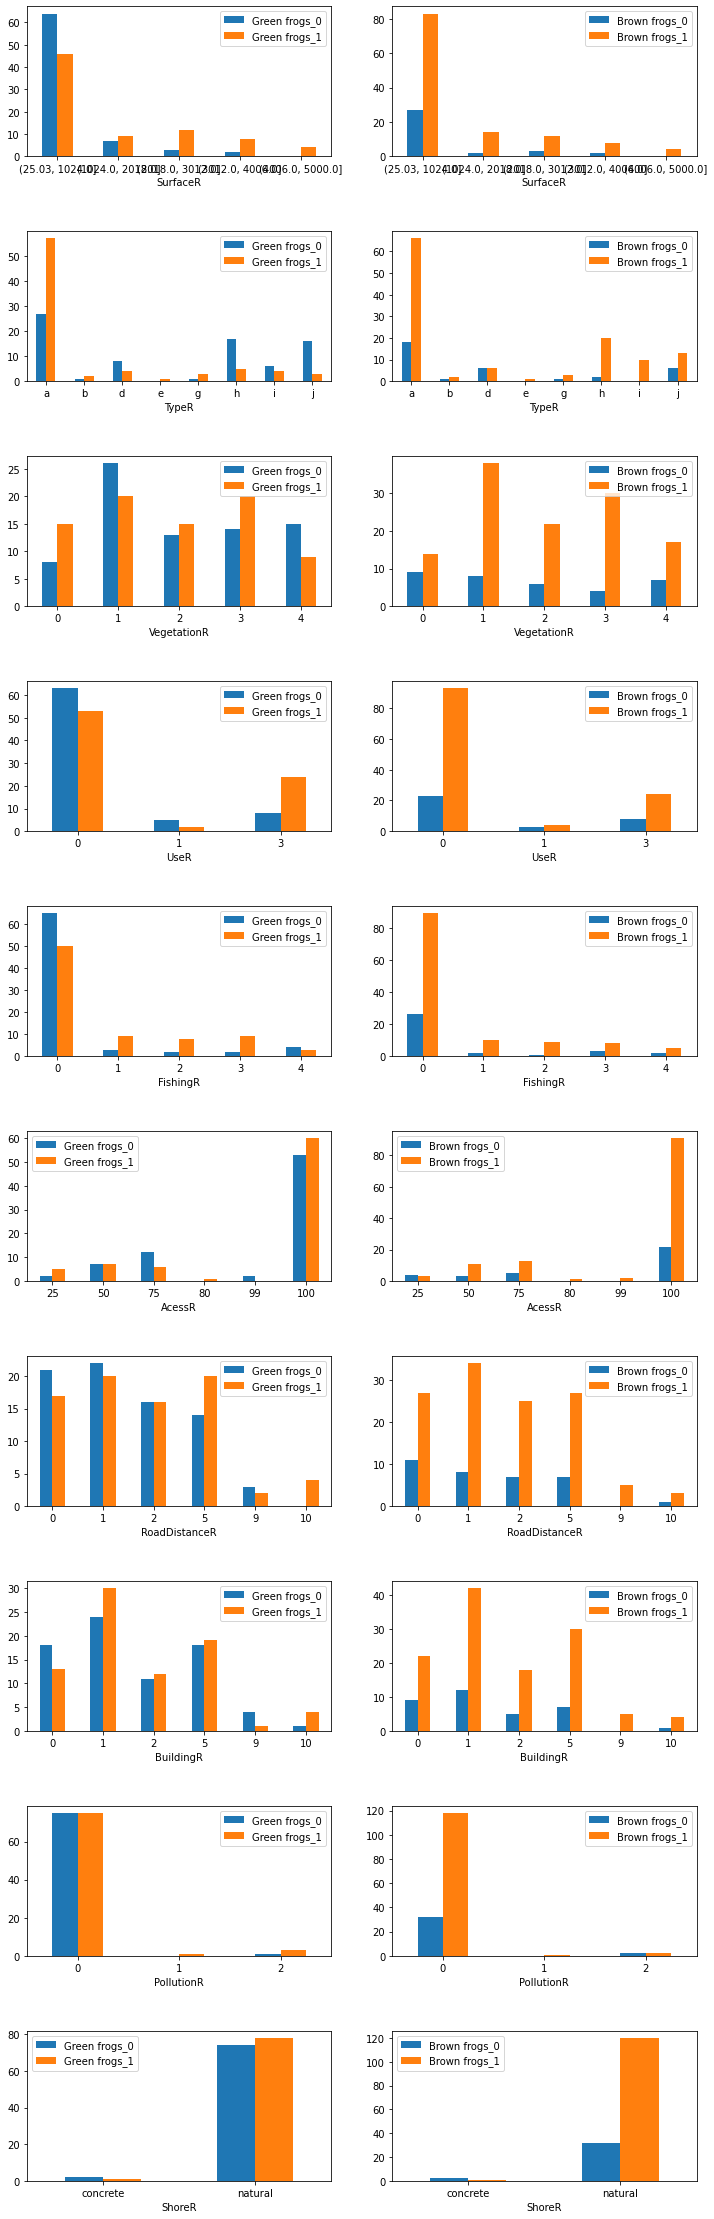

In [14]:
plot_data = regression_data.copy(deep=True)

n_features = len(regression_data.columns[:-2])

# Bin data for SurfaceR
# Data of other features already consists of a suffiently low number of unique values
plot_data["SurfaceR"] = pd.cut(plot_data["SurfaceR"], bins=5)

# Bar plots
fig, axes = plt.subplots(nrows=n_features, ncols=2, figsize=(12, n_features*4))
for plt_col, frogtype in enumerate(["Green frogs", "Brown frogs"]):
    for plt_row,feature in enumerate(plot_data.columns[:-2]):
        (pd.get_dummies(plot_data[[feature,frogtype]], columns=[frogtype])
           .groupby(feature).sum()
           .plot.bar(ax=axes[plt_row, plt_col], rot=0))

        
# Leave more space between subplots
plt.subplots_adjust(hspace=0.5)

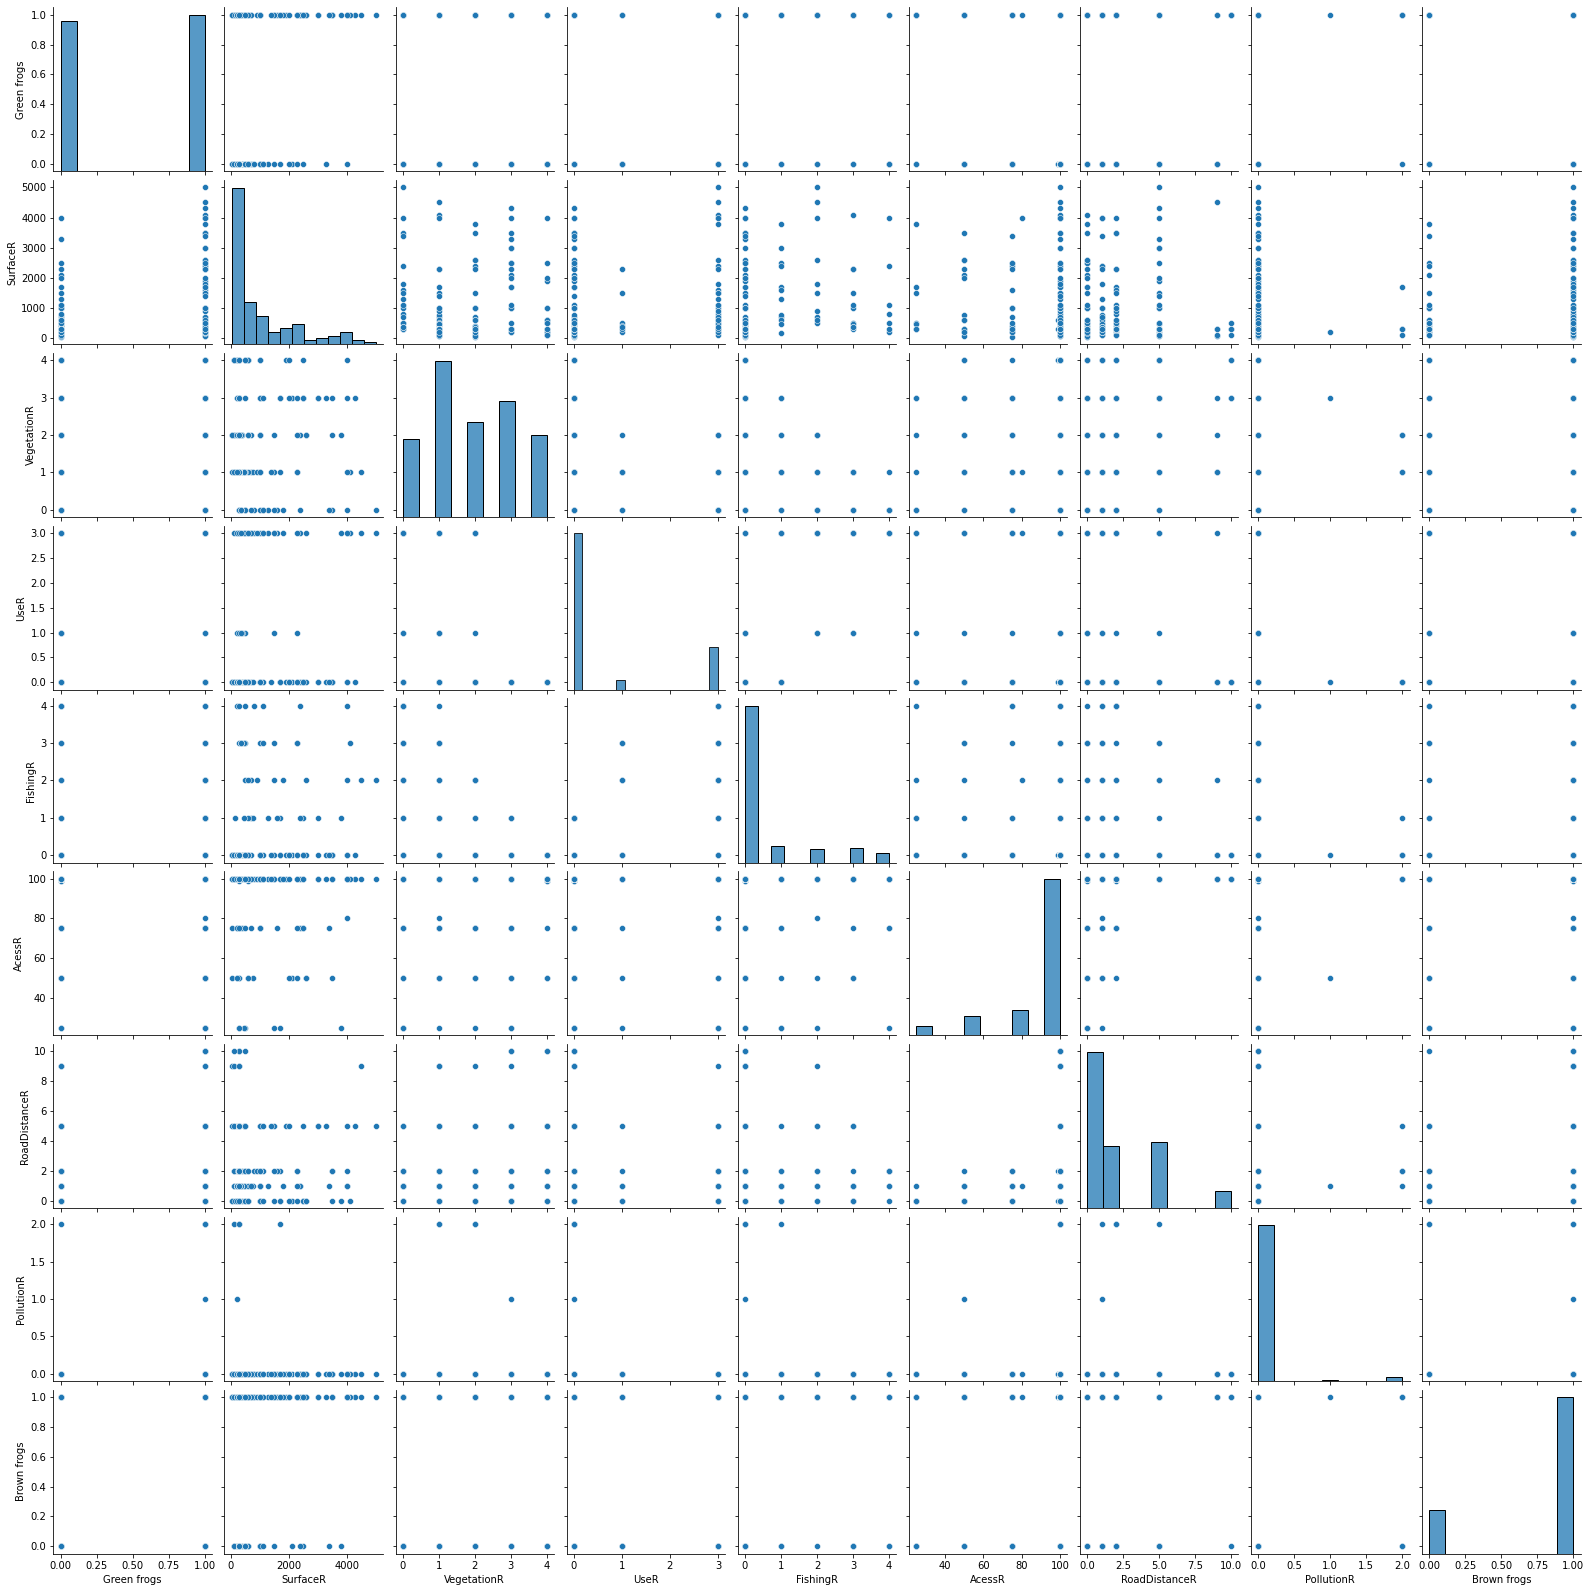

In [15]:
# Scatter matrix
sns.pairplot(regression_data, vars=["Green frogs", "SurfaceR", "VegetationR", "UseR", "FishingR",
                                    "AcessR", "RoadDistanceR", "PollutionR", "Brown frogs"])

Explanation:
- The features ShoreR and PollutionR each only have one unique value for almost all instances. Thus, as they practically do not change, they are not useful for predicting and can be dropped.
- For all other features, the bar plots above are used for feature selection. For both green and brown frogs and for each feature, a feature is chosen if the distribution of number of frogs changes (significantly) as the feature increases (or, in the categorical case, changes).
- The chosen features are listed in the dictionary below.

In [16]:
features = {
            "Green frogs": ["SurfaceR", "TypeR", "UseR", "FishingR"],
            "Brown frogs": ["SurfaceR", "TypeR", "FishingR", "BuildingR"],
           }

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [17]:
from sklearn.linear_model import LogisticRegression

# In the feature dictionary, replace the feature name TypeR with the one-hot encoded feature names
features["Green frogs"]
for frogtype in ["Green frogs", "Brown frogs"]:
    i = features[frogtype].index("TypeR")
    features[frogtype][i:i+1] = list(regression_data_onehot.columns[10:-1])

# Train linear regression models
models = {}
for frogtype in ["Green frogs", "Brown frogs"]:
    models[frogtype] = LogisticRegression(solver = "liblinear", multi_class = "ovr")
    models[frogtype].fit(regression_data_onehot[features[frogtype]],
                         regression_data_onehot[frogtype])
    print(models[frogtype].coef_)

[[ 4.67357915e-04  5.75896592e-01  1.20840676e-02 -6.14862568e-01
   3.18152852e-01  6.78742348e-01 -7.60997533e-01  8.47941574e-02
  -9.15479139e-01  4.24746968e-01 -2.00115973e-01]]
[[ 2.28269829e-04  8.12351918e-02 -2.08946267e-01 -7.56223871e-01
   1.36187330e-01 -1.74178789e-01  7.90902695e-01  1.03662034e+00
  -2.21681444e-01  8.13308941e-02  9.52983236e-02]]


   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [18]:
from sklearn.metrics import confusion_matrix

for frogtype in ["Green frogs", "Brown frogs"]:
    print(confusion_matrix(y_true=regression_data_onehot[frogtype],
                           y_pred=models[frogtype].predict(regression_data_onehot[features[frogtype]])))

[[47 29]
 [20 59]]
[[  1  33]
 [  0 121]]


(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation:

While the model for brown frogs has a higher accuracy, it is the worse model of the two, as it just predicts "brown frog is present" for (almost) every instant. This is likely a result of the fact that the data for brown frogs is imbalanced, i.e. brown frogs are present in most habitats.
Therefore the models are not really similar, as only the model for green frogs has the potential to be useful in practice.

I would definitely not recommend the model for brown frogs, as it is just as bad as a simple baseline model. The model for green frogs could be used, but it may be worth to investigate other methods to achieve higher accuracy, as the current accuracy (on the train set!) is a bit lacking. One of the models advantages though is its interpretability.

To improve the results of the models they could be trained on subsets of the data consisting of the same number of positive and negative samples each, thus accounting for the imbalance. Another way to potentially improve the models is to normalize the input features. Notably, the values of SurfaceR are a lot higher ( O(1000) ) than those of the other features used ( O(1) ).

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [19]:
svm_data = cleaned_data.drop(["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3",
                              "Common toad", "Fire-bellied toad", "Tree frog", "Common newt",
                              "Great crested newt"], axis=1)

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [20]:
# One-Hot Encoding for TypeR and ShoreR
svm_data_onehot = pd.get_dummies(svm_data, columns=["TypeR", "ShoreR"])
#regression_data_onehot = pd.concat([regression_data, one_hot], axis=1)

# Remove ShoreR_natural column as binary ShoreR_concrete feature suffices
svm_data_onehot.drop(["ShoreR_natural"], axis=1, inplace=True)

# Rename columns to be more easily readable
svm_data_onehot = svm_data_onehot.rename(columns={
                                                  "TypeR_a": "natural",
                                                  "TypeR_b": "newly formed natural",
                                                  "TypeR_c": "settling ponds",
                                                  "TypeR_d": "close to houses",
                                                  "TypeR_e": "technological",
                                                  "TypeR_f": "garden pond",
                                                  "TypeR_g": "trenches",
                                                  "TypeR_h": "wet meadows, flood plains, marshes",
                                                  "TypeR_i": "river valleys",
                                                  "TypeR_j": "streams, creeks",
                                                  "ShoreR_concrete": "ShoreConcrete",
                                                 })
# Print the resulting dataset
with pd.option_context("display.max_rows", 3, "display.max_columns", None):
    display(svm_data_onehot[:2])

SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
0       600            4     0         0      50              0          0   
1       700            1     3         1      75              1          1   

   PollutionR  Green frogs  Brown frogs  natural  newly formed natural  \
0           0            0            0        1                     0   
1           0            0            1        0                     0   

   close to houses  technological  trenches  \
0                0              0         0   
1                1              0         0   

   wet meadows, flood plains, marshes  river valleys  streams, creeks  \
0                                   0              0                0   
1                                   0              0                0   

   ShoreConcrete  
0              0  
1              0

Explanation:

As for Q3, categorical features need to be modififed. The code above and explanation below were copied and modified from that question.

**TypeR** and **ShoreR** need to be modified, all other features can be used as they are.

As TypeR and ShoreR are categorical & nominal features, they need to be transformed into numerical features first. As the other categorical features (VegetationR, UseR, FishingR, PollutionR) are ordinal (low to high) and already encoded as (sorted) numbers, they do not need to be modified.

For TypeR, there exist more than 2 possible values that can not be sorted. Thus, one-hot encoding is used to encode the feature numerically to avoid introducing an ordering by accident.

For ShoreR, there only exist two possible values (natural and concrete). Thus, a binary feature "ShoreConcrete" (true or false) suffices.

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = {}, {}
for frogtype in ["Green frogs", "Brown frogs"]:
    train_data[frogtype], test_data[frogtype] = train_test_split(svm_data_onehot,
                                                                 stratify=svm_data_onehot[frogtype],
                                                                 test_size=0.25,
                                                                 random_state=seed)

Explanation:

For brown frogs, the dataset is really imbalanced between positive and negative instances. Thus, stratified sampling is chosen as a sampling strategy to avoid the train or test set being devoid of negative samples by chance. 25% of the data is chosen as a test set. This value was chosen as the majority of the data was supposed to be used for training, while the test set should not be too small as the number of overall samples is small.

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [22]:
from sklearn.svm import SVC

models = {} # dict in which models for different frog types will be stored
for frogtype in ["Green frogs", "Brown frogs"]:
    models[frogtype] = [] # list in which both models for each frog type will be stored
    models[frogtype].append(SVC(kernel="linear",
                                C=1.))
    models[frogtype].append(SVC(kernel="poly",
                                degree=3,
                                C=0.2))
    # Fit
    for model in models[frogtype]:
        model.fit(train_data[frogtype][features[frogtype]],
                  train_data[frogtype][frogtype])

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

In [23]:
from sklearn.metrics import accuracy_score, classification_report

for frogtype in ["Green frogs", "Brown frogs"]:
    # First choice of parameters
    y_pred_test = models[frogtype][0].predict(test_data[frogtype][features[frogtype]])
    print(frogtype, ",", "linear kernel", ",", "C=1")
    print("Test acurracy = {}\n".format(accuracy_score(y_true=test_data[frogtype][frogtype],
                                                       y_pred=y_pred_test)))
    print(classification_report(y_true=test_data[frogtype][frogtype],
                                y_pred=y_pred_test))
    print()
    
    # Second choice of parameters
    y_pred_test = models[frogtype][1].predict(test_data[frogtype][features[frogtype]])
    print(frogtype, ",", "polynomial kernel", ",", "C=0.2")
    print("Test acurracy = {}\n".format(accuracy_score(y_true=test_data[frogtype][frogtype],
                                                       y_pred=y_pred_test)))
    print(classification_report(y_true=test_data[frogtype][frogtype],
                                y_pred=y_pred_test))
    print()

Green frogs , linear kernel , C=1
Test acurracy = 0.6923076923076923

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.70      0.70      0.70        20

    accuracy                           0.69        39
   macro avg       0.69      0.69      0.69        39
weighted avg       0.69      0.69      0.69        39


Green frogs , polynomial kernel , C=0.2
Test acurracy = 0.5897435897435898

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        19
           1       1.00      0.20      0.33        20

    accuracy                           0.59        39
   macro avg       0.77      0.60      0.52        39
weighted avg       0.78      0.59      0.51        39


Brown frogs , linear kernel , C=1
Test acurracy = 0.7692307692307693

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       

C:\Users\janmi\anaconda3\envs\IDS\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\janmi\anaconda3\envs\IDS\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

In [24]:
# Compute test accuracies for simple baseline models
# that always predict that a frog is present
for frogtype in ["Green frogs", "Brown frogs"]:
    baseline = test_data[frogtype][frogtype].sum() / test_data[frogtype][frogtype].shape[0]
    print ("Baseline test accuracy for {}: {}".format(frogtype, baseline))

Baseline test accuracy for Green frogs: 0.5128205128205128
Baseline test accuracy for Brown frogs: 0.7692307692307693


Explanation:

The SVMs for **brown frogs** suffer from the same problem as the regression models: They do not surpass the accuracy of a simple baseline model (0.77) that always predicts that a brown frog is present. Thus, I would not recommend to use them.

In contrast, the SVMs for **green frogs** surpass the baseline accuracy, i.e. they produce predictions that are actually useful. Based on accurary, the linear kernel SVM with C=1 seems to work a lot better than the polynomial kernel SVM with C=0.2. Interestingly, the polynomial kernel SVM for green frogs seems biased towards TODO (see precision and recall)

## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [25]:
# Upload it to the submission version

# Compute number of unique values for all categorical features
for feature in ["TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3",
                "UseR", "FishingR", "PollutionR", "ShoreR"]:
    n_unique = sampled_data[feature].unique().shape[0]
    print("Feature {feature:<18} has {n_unique:>6} unique values".format(feature=feature, n_unique=n_unique))

Feature TypeR              has      8 unique values
Feature VegetationR        has      5 unique values
Feature Surroundings1      has      8 unique values
Feature Surroundings2      has      7 unique values
Feature Surroundings3      has      8 unique values
Feature UseR               has      3 unique values
Feature FishingR           has      5 unique values
Feature PollutionR         has      3 unique values
Feature ShoreR             has      2 unique values


Explanation:

The above code computes the number of unique values in the dataset for each categorical feature. Note that "low-to-high"-features are also regarded as categorical. TODO: second part

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [26]:
# Use the categorical feature Surroundings1
# Use the non-categorical features SurfaceR, BuildingR
NN_data = sampled_data[["TypeR", "SurfaceR", "BuildingR"] # Descriptive features
                       + sampled_data.columns[-7:].tolist() # Target features (different frogs)
                      ].copy(deep=True) # Copy to avoid reference to original sampled_data
NN_data[:2]

TypeR  SurfaceR  BuildingR  Green frogs  Brown frogs  Common toad  \
0     a       600          0            0            0            0   
1     d       300          0            0            0            1   

   Fire-bellied toad  Tree frog  Common newt  Great crested newt  
0                  0          0            0                   0  
1                  0          0            0                   0

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

Explanation:

As TypeR is a nomimal categorical feature 

In [27]:
# One-Hot Encoding for Surroundings1
NN_data_encoded = pd.get_dummies(NN_data, columns=["TypeR"])

# Re-order elements so the target features are the last columns
columns = NN_data_encoded.columns.tolist()
columns = columns[:2] + columns[9:] + columns[2:9]
NN_data_encoded = NN_data_encoded[columns]
NN_data_encoded[:5]

SurfaceR  BuildingR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
0       600          0        1        0        0        0        0        0   
1       300          0        0        0        1        0        0        0   
2       600          5        1        0        0        0        0        0   
3       200          0        0        0        1        0        0        0   
4       500          0        0        0        1        0        0        0   

   TypeR_i  TypeR_j  Green frogs  Brown frogs  Common toad  Fire-bellied toad  \
0        0        0            0            0            0                  0   
1        0        0            0            0            1                  0   
2        0        0            0            1            1                  1   
3        0        0            0            0            0                  0   
4        0        0            0            0            1                  0   

   Tree frog  Common newt  Great crested newt  
0          0            0                   0  
1          0            0                   0  
2          0            1                   1  
3          0            0                   0  
4          0            0                   0

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [28]:
train_NN, test_NN = train_test_split(NN_data_encoded, test_size=0.1, random_state=seed)
print(train_NN.shape, test_NN.shape)

(153, 17) (17, 17)


   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [58]:
from sklearn.neural_network import MLPClassifier
descriptive_features = train_NN.columns[:-7]
target_features = train_NN.columns[-7:]

# (linear activation function):
model_lin = MLPClassifier(activation="identity")
model_lin.fit(train_NN[descriptive_features], train_NN[target_features])

# Compute accuracy
y_pred_lin = model_lin.predict(test_NN[descriptive_features])
accuracy_lin = accuracy_score(y_true=test_NN[target_features], y_pred=y_pred_lin)
print("Test accuracy of model with linear activation: {}".format(accuracy_lin))

def compute_individual_accuracy(y_true, y_pred, columns=target_features.to_list()):
    """
    Compute the accuracy per feature instead of overall accuracy where every feature of an
    instance has to be predicted right.
    """
    #accuracy = 1 - number of wrongly predicted instances / number of instances
    #computed for each target feature, therefore axis=0 in sum
    accuracy =  1 - np.sum(np.abs((y_pred - y_true)), axis=0) / np.prod(y_pred.shape[0])
    average_accuracy = accuracy.mean()
    for acc, feature in zip(accuracy, columns):
        print("Accuracy for {feature}: {acc}".format(feature=feature, acc=acc))
    print("Average accuracy: {avg_acc}".format(avg_acc=average_accuracy))

print()
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(), y_pred=y_pred_lin)

Test accuracy of model with linear activation: 0.0

Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.8235294117647058
Accuracy for Common toad: 0.8235294117647058
Accuracy for Fire-bellied toad: 0.2941176470588235
Accuracy for Tree frog: 0.47058823529411764
Accuracy for Common newt: 0.6470588235294117
Accuracy for Great crested newt: 0.8823529411764706
Average accuracy: 0.6470588235294118


In [60]:
# (non-linear activation function):
model_relu = MLPClassifier(activation="relu")
model_relu.fit(train_NN[descriptive_features], train_NN[target_features])

# Compute accuracy
y_pred_relu = model_relu.predict(test_NN[descriptive_features])
accuracy_relu = accuracy_score(y_true=test_NN[target_features], y_pred=y_pred_relu)
print("Test accuracy of model with relu activation: {}".format(accuracy_relu))
print()
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(), y_pred=y_pred_relu)

Test accuracy of model with relu activation: 0.058823529411764705

Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.8235294117647058
Accuracy for Common toad: 0.8235294117647058
Accuracy for Fire-bellied toad: 0.5294117647058824
Accuracy for Tree frog: 0.47058823529411764
Accuracy for Common newt: 0.4117647058823529
Accuracy for Great crested newt: 0.8235294117647058
Average accuracy: 0.638655462184874


Explanation:

A linear activation function and ReLU perform about the same. The average accuracy varies slightly between training runs because of different random initializations, but tends to produce the same results for both activations.

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [79]:
# model number 3
model_3 = MLPClassifier(activation="relu", hidden_layer_sizes=(150,)*3, alpha=0.001)
model_3.fit(train_NN[descriptive_features], train_NN[target_features])

# Compute accuracy
y_pred_3 = model_3.predict(test_NN[descriptive_features])
accuracy_3 = accuracy_score(y_true=test_NN[target_features], y_pred=y_pred_3)
print("Test accuracy of model number 3: {}".format(accuracy_3))
print()
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(), y_pred=y_pred_3)
print("\n")


# model number 4
model_4 = MLPClassifier(activation="relu", batch_size=8, solver="sgd")
model_4.fit(train_NN[descriptive_features], train_NN[target_features])

# Compute accuracy
y_pred_4 = model_4.predict(test_NN[descriptive_features])
accuracy_4 = accuracy_score(y_true=test_NN[target_features], y_pred=y_pred_4)
print("Test accuracy of model number 4: {}".format(accuracy_4))
print()
compute_individual_accuracy(y_true=test_NN[target_features].to_numpy(), y_pred=y_pred_4)

Test accuracy of model number 3: 0.0

Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.17647058823529416
Accuracy for Common toad: 0.8235294117647058
Accuracy for Fire-bellied toad: 0.23529411764705888
Accuracy for Tree frog: 0.5882352941176471
Accuracy for Common newt: 0.5294117647058824
Accuracy for Great crested newt: 0.8823529411764706
Average accuracy: 0.546218487394958


Test accuracy of model number 4: 0.058823529411764705

Accuracy for Green frogs: 0.5882352941176471
Accuracy for Brown frogs: 0.8235294117647058
Accuracy for Common toad: 0.8235294117647058
Accuracy for Fire-bellied toad: 0.7058823529411764
Accuracy for Tree frog: 0.5882352941176471
Accuracy for Common newt: 0.6470588235294117
Accuracy for Great crested newt: 0.8823529411764706
Average accuracy: 0.7226890756302521


Explanation: Adding more layers / units per layer does not considerably improve the average accuracy. Choosing a smaller sample size (default is min(n_samples, 200)) and using sgd istead of ADAM seems to work better than other methods. (TODO: improve explanation)

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [96]:
from sklearn.model_selection import KFold
n_splits = 3
kf = KFold(n_splits=n_splits)

# Fit the six models on train folds
model_3_list, model_4_list = [], [] # models will be stored in those lists
for train_index, test_index in kf.split(NN_data):
    # Train model 3
    model_3_list.append(MLPClassifier(activation="relu", hidden_layer_sizes=(150,)*3,
                                      alpha=0.001))
    model_3_list[-1].fit(NN_data_encoded.loc[train_index][descriptive_features],
                         NN_data_encoded.loc[train_index][target_features],)
    # Train model 4
    model_4_list.append(MLPClassifier(activation="relu", batch_size=8, solver="sgd"))
    model_4_list[-1].fit(NN_data_encoded.loc[train_index][descriptive_features],
                         NN_data_encoded.loc[train_index][target_features],)

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [33]:
# Your code for the confusion matrices on the training data

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [34]:
# Your code for the confusion matrices on the test data

- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [35]:
# Your code for precision, recall and F1-scores on the test data

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [36]:
# Your code for accuracy scores on training and test data

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

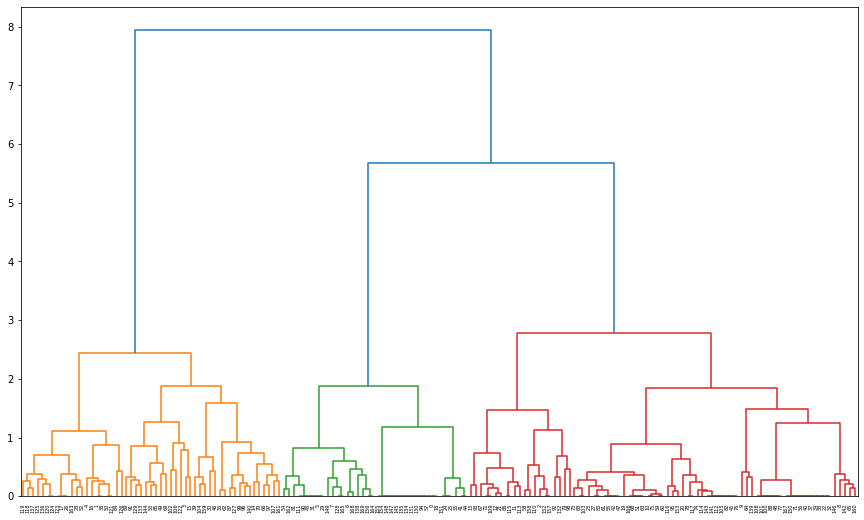

In [37]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Drop non-needed columns
cluster_data = sampled_data[["VegetationR", "UseR", "FishingR", "RoadDistanceR",
                             "BuildingR", "PollutionR"]]

# Normalize data
cluster_data_norm = normalize(cluster_data)

# Create dendogram
plt.figure(figsize=(15,9))
linkage = shc.linkage(cluster_data_norm, method="ward")
dendogram = shc.dendrogram(linkage, show_leaf_counts=True)
plt.show()

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

The vertical axis shows the selected measure of dissimilarity. The horizontal axis names all instances and has no numerical interpretation. Because of the way the dendogram is structured though, instances are closer together on the horizontal axis the earlier they join the same cluster. Again, the distance has no numerical intepretation though.

The algorithm that produced the clusters is a greedy algortihm working from the bottom of the diagram to the top. Therefore, as it has no problems finding similar instances / clusters in the beginning, the clusters at the bottom are close together. The more steps the algorithm makes though, the more heterogeneous / dissimilar clusters become. It is thus less and less easy for the algorithm to find a pair of clusters that increases the dissimilarity measure as little as it did in the beginning, which means that clusters generated later by the algorithm, i.e. thus at the top, will generally have a larger distance between them.

(c) Split the diagram at 3 and find the number the clusters at this point.

In [38]:
# Find number of clusters such that each two clusters
# have a dissimilarity score of at least 3
n_clusters = np.sum(linkage[:,2] > 3) + 1
# Explanation: 
# Linkage matrix "linkage[:,2]" stores the y-values for all splits
# np.sum(... > 3) computes the number of splits (from top to bottom) with y-value > 3
# number of clusters after n splits = n + 1 ---> add 1 to the number of splits to get n_clusters
print(n_clusters)

3


(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

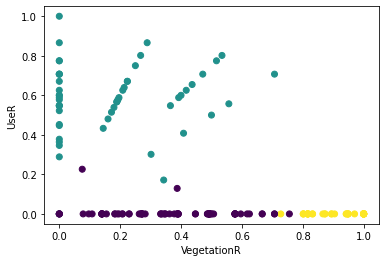

In [39]:
# Your code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(cluster_data_norm)

plt.scatter(pd.DataFrame(cluster_data_norm, columns=cluster_data.columns)["VegetationR"],
            pd.DataFrame(cluster_data_norm, columns=cluster_data.columns)["UseR"],
            c=cluster.labels_)
plt.xlabel("VegetationR")
plt.ylabel("UseR")
plt.show()